# Churn Analysis in Banking

## Importing Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
%matplotlib inline

## Reading the Data

In [2]:
import os
os.chdir("C:\\Users\\rajag\\OneDrive\\Desktop\\Datasets")
df = pd.read_csv('./Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## About the Data

#### Shape of the Data

In [4]:
df.shape

(10000, 14)

#### Data Attributes

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

#### Data Types

In [6]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

#### Summary

In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### Null Values

In [8]:
#Null Values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### Unique Values

In [9]:
for col in df:
    print(f'{col}: {df[col].unique()}')

RowNumber: [    1     2     3 ...  9998  9999 10000]
CustomerId: [15634602 15647311 15619304 ... 15584532 15682355 15628319]
Surname: ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 7

## Data Cleaning

In [10]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Found something unusual in EstimatedSalary

In [12]:
df.EstimatedSalary.describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

The Minimum Estimated Salary is 11.58 which is very low, and have to check this!!

In [13]:
df.loc[df.EstimatedSalary == 11.580000]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2362,709,Germany,Male,45,4,122917.71,1,1,1,11.58,1


In [14]:
low_sal = df[(df.EstimatedSalary >= 11.58) &  (df.EstimatedSalary <= 999)].sort_values("EstimatedSalary", ascending = True)
low_sal

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2362,709,Germany,Male,45,4,122917.71,1,1,1,11.58,1
9647,625,France,Male,31,5,0.00,2,0,1,90.07,0
9010,645,Germany,Female,59,8,121669.93,2,0,0,91.75,1
5548,710,France,Male,38,2,0.00,2,1,0,96.27,0
4989,629,France,Male,40,9,0.00,1,1,0,106.67,0
7565,708,France,Male,52,10,105355.81,1,1,0,123.07,1
2498,718,France,Male,37,8,0.00,2,1,1,142.81,0
8722,621,France,Male,35,7,87619.29,1,1,0,143.34,0
4774,811,France,Female,35,7,0.00,1,1,1,178.19,0
1451,551,France,Female,38,10,0.00,2,1,1,216.27,0


In [15]:
# Count 
country_wise_count = low_sal.Geography.value_counts()
country_wise_count

France     34
Germany    17
Spain       8
Name: Geography, dtype: int64

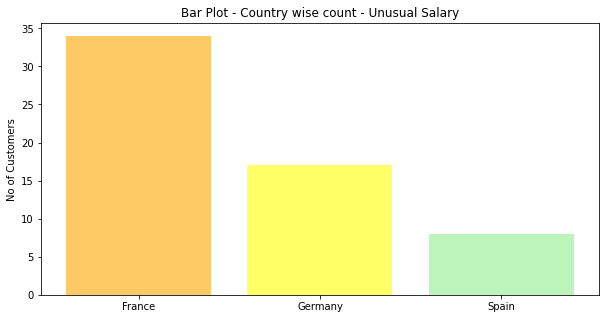

In [16]:
# Converting pandas series to Dictionary
country_wise_count = low_sal.Geography.value_counts()
country_wise_count = country_wise_count.to_dict()

# Converting key and values into lists
country = list(country_wise_count.keys())
coun_t = list(country_wise_count.values())
              
# Barplot
plt.figure(figsize = (10,5))
plt.bar(country, coun_t, color = ['orange', 'yellow', 'lightgreen'], alpha = 0.6)
plt.ylabel("No of Customers")
plt.title("Bar Plot - Country wise count - Unusual Salary")
plt.show()


Text(0.5, 1.0, 'Box Plot - Estimated Salary')

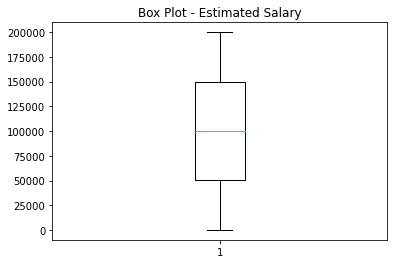

In [17]:
plt.boxplot([df.EstimatedSalary])
plt.title("Box Plot - Estimated Salary")

But checking Statistically using Whiskers plot, there is no any outliers detected in both upper and lower limits.

Initially I thought the Estimated Salary '11.58' could be an Outlier, but it has not spotted in the whiskers plot.

So hence for the sake of Model training I include all these unusual values also.

#### Checking Age

Text(0.5, 1.0, 'Box Plot - Age')

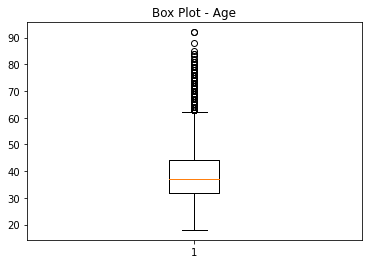

In [18]:
plt.boxplot([df.Age])
plt.title("Box Plot - Age")

#### Outlier Detection using IQR 

In [19]:
q1 = df.Age.quantile(0.25)
q3 = df.Age.quantile(0.75)

In [20]:
IQR = q3-q1
IQR

12.0

In [21]:
l = q1 - 1.5*IQR
u = q3 + 1.5*IQR

In [22]:
age_dict_df = df[(df.Age > u)]
age_dict_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
58,511,Spain,Female,66,4,0.00,1,1,0,1643.11,1
85,652,Spain,Female,75,10,0.00,2,1,1,114675.75,0
104,670,Spain,Female,65,1,0.00,1,1,1,177655.68,1
158,646,France,Female,73,6,97259.25,1,0,1,104719.66,0
181,510,France,Male,65,2,0.00,2,1,1,48071.61,0
...,...,...,...,...,...,...,...,...,...,...,...
9753,656,Germany,Male,68,7,153545.11,1,1,1,186574.68,0
9765,445,France,Male,64,2,136770.67,1,0,1,43678.06,0
9832,595,Germany,Female,64,2,105736.32,1,1,1,89935.73,1
9894,521,France,Female,77,6,0.00,2,1,1,49054.10,0


Here we could see 359 observation which are above the Upper Limit in box plot.

In [23]:
age_dict = df[(df.Age > u)].Age.value_counts()
age_dict = age_dict.to_dict()
age_dict

{63: 40,
 67: 37,
 64: 37,
 66: 35,
 71: 27,
 69: 22,
 72: 21,
 68: 19,
 74: 18,
 70: 18,
 65: 18,
 73: 13,
 76: 11,
 77: 10,
 75: 9,
 78: 5,
 79: 4,
 81: 4,
 80: 3,
 92: 2,
 84: 2,
 82: 1,
 85: 1,
 88: 1,
 83: 1}

Text(0.5, 1.0, 'Count of Ages above upper limit')

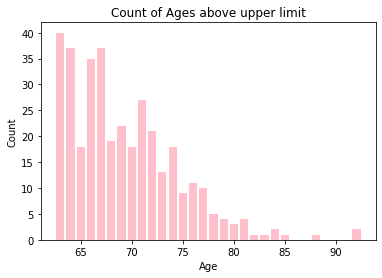

In [24]:
age = list(age_dict.keys())
count_age = list(age_dict.values())

# Bar Plot
plt.bar(age, count_age, color = 'pink')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Count of Ages above upper limit")

It is clearly obsereved that, though we have outliers, they are not impacting the data set much..

The distribution of Observations based on ages above upper limit shows that many observations lies between the age category of 
63-75. 

Only few observations are there above 80 yrs.

So this is practically acceptable if am not wrong..

## Exploratory Data Analysis and Visualizations

### Age

In [25]:
import seaborn as sn

#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

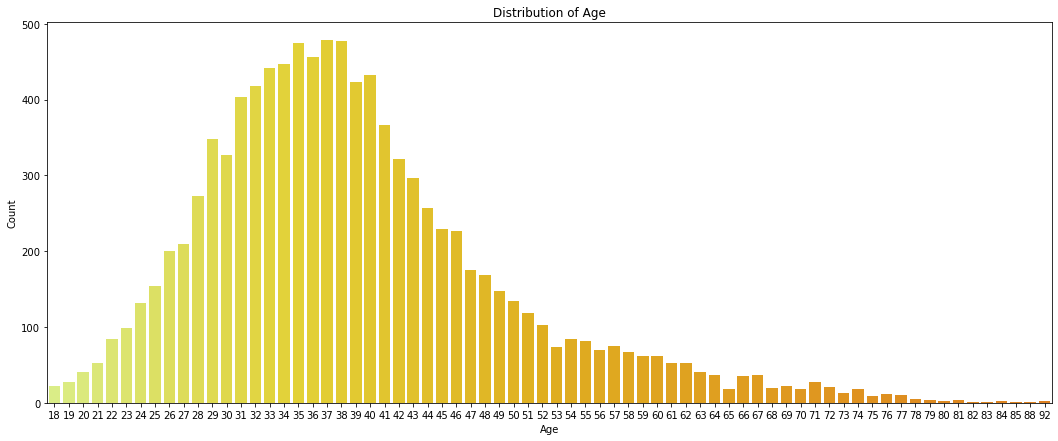

In [26]:
Age_Count = df.Age.value_counts()
Age_Count = Age_Count.to_dict()

Age = list(Age_Count.keys())
Count = list(Age_Count.values())

#Bar Plot
plt.figure(figsize = (18,7))
Age_bar =sn.barplot(Age, Count, palette = 'Wistia')
Age_bar.set_xlabel("Age")
Age_bar.set_ylabel('Count')
Age_bar.set_title('Distribution of Age')
plt.show()

The above visulization is looks like a Gaussian or Normal Distribution, which has 'bell shaped' curve.

### Geography

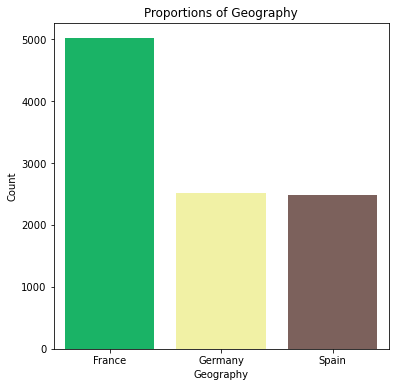

In [27]:
Geo = df.Geography.value_counts()
Geo = Geo.to_dict()

Country_Geo = list(Geo.keys())
Count_Geo = list(Geo.values())

# Bar Plot

plt.figure(figsize = (6,6))
Geo_bar = sn.barplot(x = Country_Geo, y = Count_Geo , palette = 'terrain', label = ['France', 'Germany','Spain'])

Geo_bar.set_title("Proportions of Geography")
Geo_bar.set_ylabel("Count")
Geo_bar.set_xlabel("Geography")
plt.show()

#### Geography vs Exited 

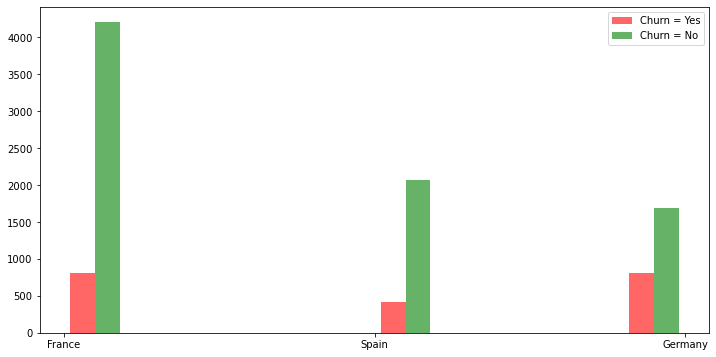

In [28]:
Geo_Count_Exited = df[df.Exited == 1].Geography
Geo_Count_NotExited = df[df.Exited == 0].Geography

Countries = ['France', 'Germany', 'Spain']

plt.figure(figsize = (12,6))
plt.hist([Geo_Count_Exited, Geo_Count_NotExited],color = ['red', 'green'], label = ['Churn = Yes', 'Churn = No'], alpha = 0.6)
plt.legend()
plt.show()

### Gender

<AxesSubplot:title={'center':'Proportions of Gender'}, xlabel='Gender', ylabel='Count'>

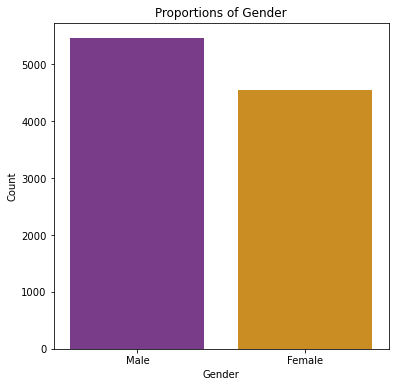

In [29]:
Gen = df.Gender.value_counts()
Gen = Gen.to_dict()

Gend = list(Gen.keys())
Count_Gend = list(Gen.values())

plt.figure(figsize = (6,6))
Gen_bar = sn.barplot(Gend, Count_Gend, palette = 'CMRmap')
Gen_bar.set_xlabel("Gender")
Gen_bar.set_ylabel("Count")
Gen_bar.set_title("Proportions of Gender")
Gen_bar

#### Gender vs Exited

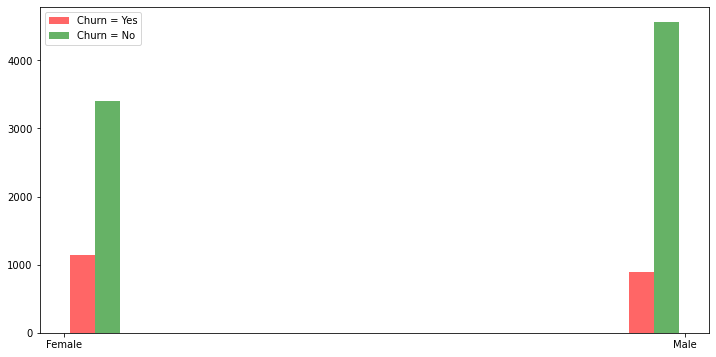

In [30]:
GenExit = df[df.Exited == 1].Gender
Gen_NotExit = df[df.Exited == 0].Gender

Genders = ['Male', "Female"]

plt.figure(figsize = (12,6))
plt.hist([GenExit, Gen_NotExit],color = ['red', 'green'], label = ['Churn = Yes', 'Churn = No'], alpha = 0.6)
plt.legend()
plt.show()

### Tenure 

<AxesSubplot:title={'center':'Distribution of Tenure'}, xlabel='Tenure', ylabel='Count'>

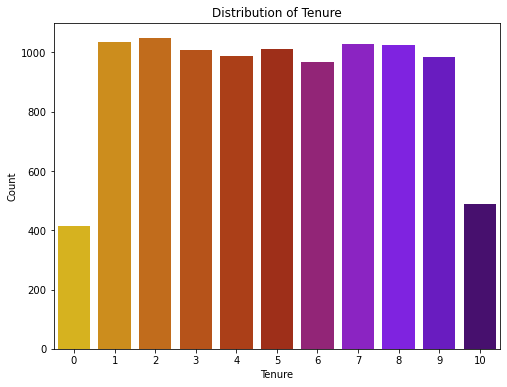

In [31]:
Tnr = df.Tenure.value_counts()
Tnr = Tnr.to_dict()

Tenure = list(Tnr.keys())
Count_Tnr = list(Tnr.values())


plt.figure(figsize = (8,6))
Tnr_bar = sn.barplot(Tenure, Count_Tnr, palette = 'gnuplot_r')
Tnr_bar.set_xlabel("Tenure")
Tnr_bar.set_ylabel("Count")
Tnr_bar.set_title("Distribution of Tenure")
Tnr_bar

#### Tenure vs Exited

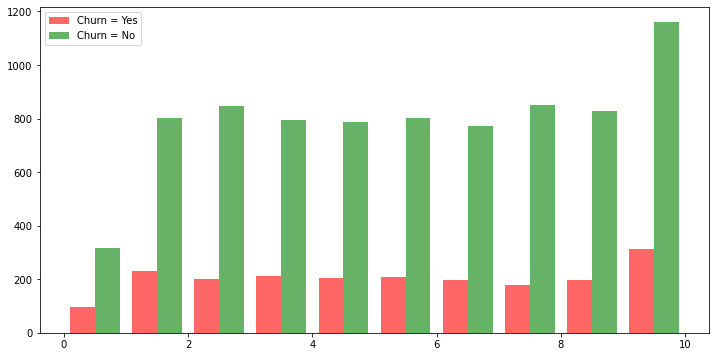

In [32]:
TenExit = df[df.Exited == 1].Tenure
Ten_NotExit = df[df.Exited == 0].Tenure

Genders = ['Male', "Female"]

plt.figure(figsize = (12,6))
plt.hist([TenExit, Ten_NotExit],color = ['red', 'green'], label = ['Churn = Yes', 'Churn = No'], alpha = 0.6)
plt.legend()
plt.show()

## Analysis on Exited Customers

Lets explore more on 'Exited' Customers and we try to find why they do so using various visualizations

### CreditScore vs EstimatedSalary

<AxesSubplot:title={'center':'CreditScore vs EstimatedSalary'}, xlabel='EstimatedSalary', ylabel='CreditScore'>

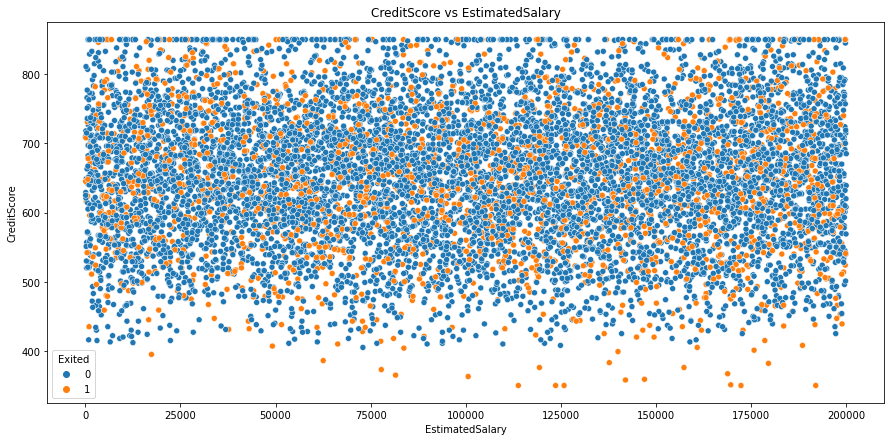

In [33]:
plt.figure(figsize = (15,7))
Sc_CvsE =sn.scatterplot(data = df, x= 'EstimatedSalary', y ='CreditScore', hue = 'Exited' )
Sc_CvsE.set_title("CreditScore vs EstimatedSalary")
Sc_CvsE

We could see the spread of data points using a scatterplot. The points are more densed. and we can see there are 
more number of points which are 'Not Exited'.

### Lets Split the original dataframe based on Exited

In [34]:
df_Exit = df[df.Exited == 1]
df_NotExit = df[df.Exited == 0]

df_Exit.sample(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5833,656,Germany,Female,49,9,97092.87,1,1,0,74771.22,1
9162,665,Germany,Male,63,7,104469.58,1,1,1,25165.36,1
6122,619,France,Male,44,3,116967.68,1,1,0,5075.17,1


### CreditScore vs EstimatedSalary - Exited Customers

<AxesSubplot:title={'center':'CreditScore vs EstimatedSalary - Exited customers'}, xlabel='EstimatedSalary', ylabel='CreditScore'>

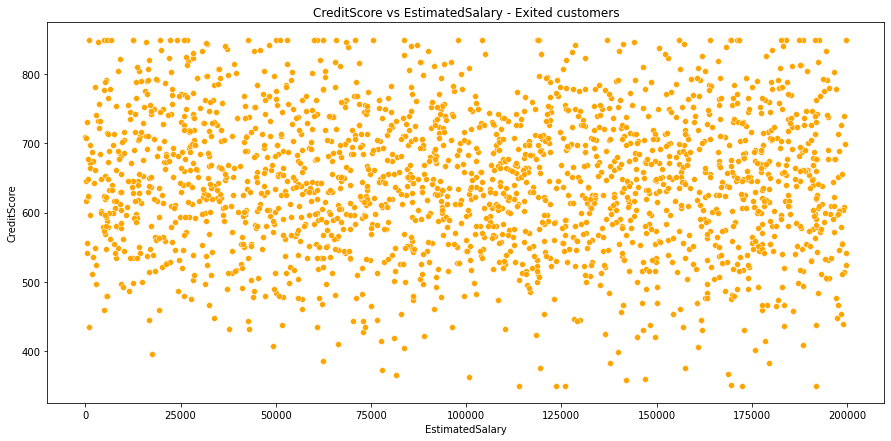

In [35]:
plt.figure(figsize = (15,7))
Sc_Exit = sn.scatterplot(data = df_Exit, x= 'EstimatedSalary', y ='CreditScore', color = 'orange')
Sc_Exit.set_title('CreditScore vs EstimatedSalary - Exited customers')
Sc_Exit

Lets seperate the 'Exited' data points from the previous one. And here we cant see any linear relationships, since the data points are spread horizontally and moreover there are more dense between the CreditScore range of 500 - 700.
Its shows no relationship since, the Estimated Salary increases, the credit score is not increseas as well.
In Simple words, Customers having 25000 as Estimated Salary also having credit score in a range of 500-700 same like Customers having estimated salary as 150000

### Distribution of Age - Exited Customers

<AxesSubplot:title={'center':'Distribution of Age - Exited Customers'}>

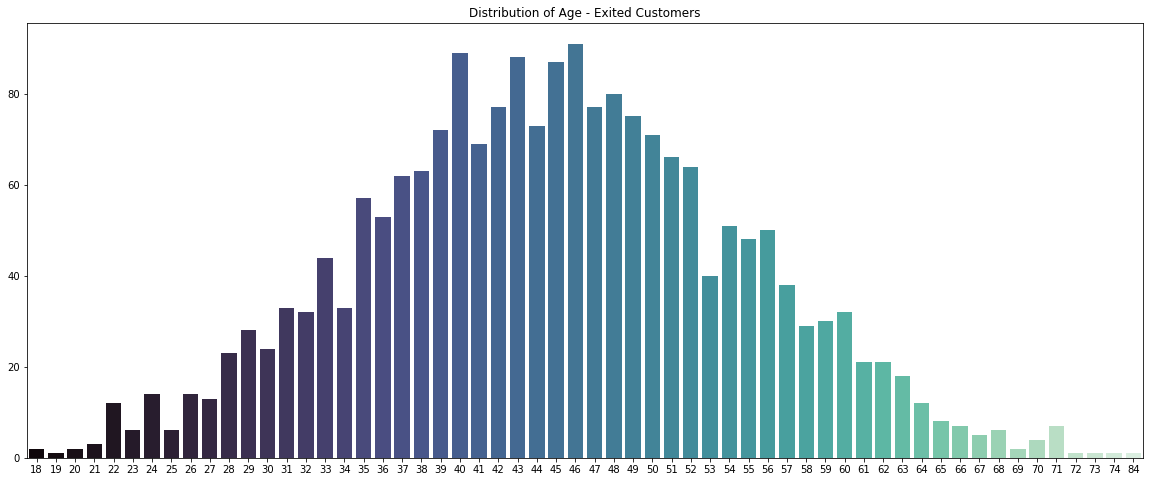

In [36]:
Age_Exit = df_Exit.Age.value_counts()
Age_Exit = Age_Exit.to_dict()

age_exit = list(Age_Exit.keys())
age_count = list(Age_Exit.values())

plt.figure(figsize = (20,8))
AE_Bar = sn.barplot(age_exit, age_count, palette = 'mako')
AE_Bar.set_title('Distribution of Age - Exited Customers')
AE_Bar

Again it seems to be a Normal Distribution and we could see that there more number of customers who are in 
the age range between 35 - 55 years.

Customers who Churn more are in the age range between 35 - 55 years

### Distribution of Balance - Exited vs Not Exited

<Figure size 864x432 with 0 Axes>

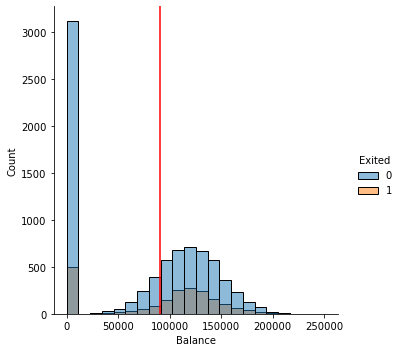

In [37]:
plt.figure(figsize=(12,6))
sn.displot(data = df, x = 'Balance', hue = 'Exited')
plt.axvline(df_Exit.Balance.mean(), color = 'red')

There are more number of 0 balance accounts in the observations. 
If we consider the 0 balance as a factor, its not that much feasible factor for churning since there are also more number of 0 balance accounts in Not Exited class also.

### Distribution of NumOfProducts - Exited

<AxesSubplot:xlabel='NumOfProducts', ylabel='Count'>

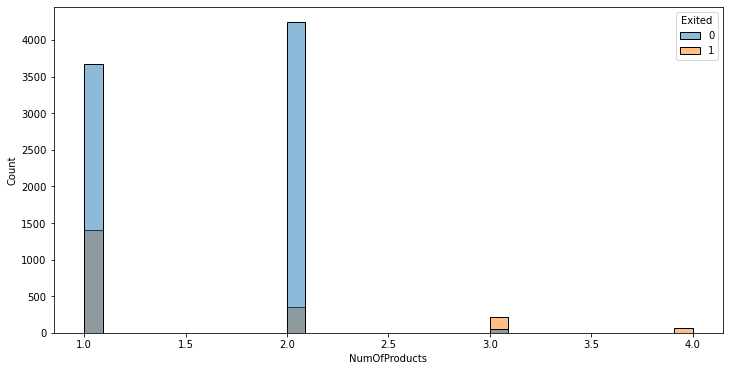

In [38]:
plt.figure(figsize=(12,6))
sn.histplot(data = df, x = 'NumOfProducts', hue = 'Exited')

<AxesSubplot:>

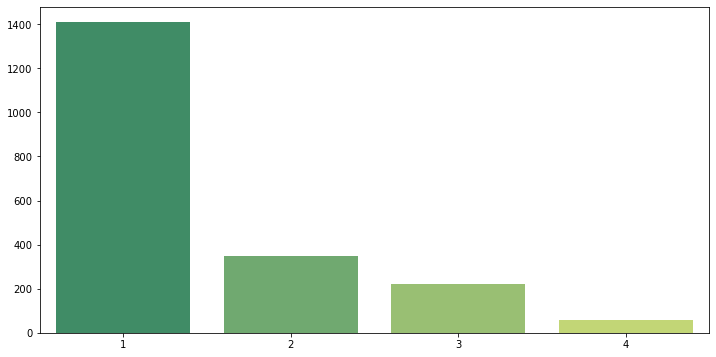

In [39]:
NOP = df_Exit.NumOfProducts.value_counts()
NOP = NOP.to_dict()

NOP_exit = list(NOP.keys())
NOP_count = list(NOP.values())


plt.figure(figsize = (12.,6))
sn.barplot(NOP_exit, NOP_count, palette = 'summer')


There are more number of customers who are having 2 products generally. But the more number of customers who leaves the bank are having only 1 product.
But we cant say this could be factor for the churn, as there are also certain customers who are not exited the bank, also in more numbers than who left in terms of holding only 1 product.
Hence this also wont be a proper factor for churn.


### Analysis of Credit Card with Customers

#### Case 1: Customer with No Credit Cards - Exited and Not Exited

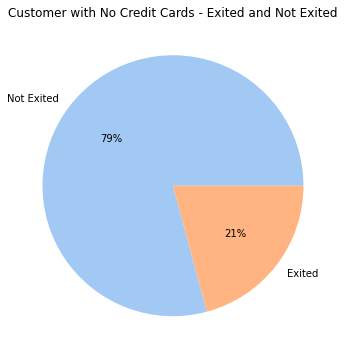

In [40]:
Not_Exited_with_Nocard = len(df[(df.HasCrCard == 0) & (df.Exited == 0)])
Exited_with_NoCard = len(df[(df.HasCrCard == 0) & (df.Exited == 1)]) 

#data
case_1 = [Not_Exited_with_Nocard,Exited_with_NoCard]
case_1

#labels
keys = ['Not Exited', 'Exited']

color_p = sn.color_palette('pastel')

plt.figure(figsize=(12,6))
plt.title('Customer with No Credit Cards - Exited and Not Exited')
plt.pie(case_1, labels = keys, colors = color_p, autopct = f'%.0f%%')
plt.show()

#### Case 2: Customer with Credit Cards - Exited and Not Exited

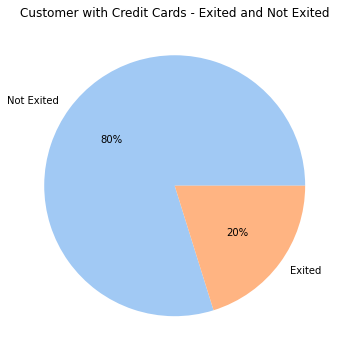

In [41]:
Not_Exited_with_Card = len(df[(df.HasCrCard == 1) & (df.Exited == 0)])
Exited_with_Card = len(df[(df.HasCrCard == 1) & (df.Exited == 1)]) 

#data
case_2 = [Not_Exited_with_Card,Exited_with_Card]
case_2

#labels
keys = ['Not Exited', 'Exited']

color_p = sn.color_palette('pastel')

plt.figure(figsize=(12,6))
plt.title('Customer with Credit Cards - Exited and Not Exited')
plt.pie(case_2, labels = keys, colors = color_p, autopct = f'%.0f%%')
plt.show()

In both the Cases the rate of customers who leave is less than the customers who are continuing. And the 'Exited' rate are more or less looks similar. Hence the Credit Cards of the Customers are not influencing.

If there is a difference, it cab be due to some possible reasons like high charges for Card Transactions or High interest rate etcc.

### Inactive vs Active Customer towards Exited

#### Case 1: Inactive Customers - Exited and Not Exited

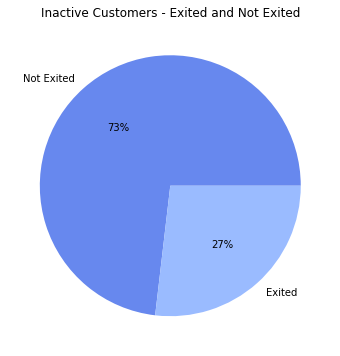

In [42]:
No_ActiveMember_remain = len(df[(df.IsActiveMember == 0) & (df.Exited == 0)])
No_ActiveMember_left = len(df[(df.IsActiveMember == 0) & (df.Exited == 1)]) 

#data
case_1 = [No_ActiveMember_remain,No_ActiveMember_left]
case_1

#labels
keys = ['Not Exited', 'Exited']

color_p = sn.color_palette('coolwarm')

plt.figure(figsize=(12,6))
plt.title('Inactive Customers - Exited and Not Exited')
plt.pie(case_1, labels = keys, colors = color_p, autopct = f'%.0f%%')
plt.show()

#### Case 2: Inactive Customers - Exited and Not Exited

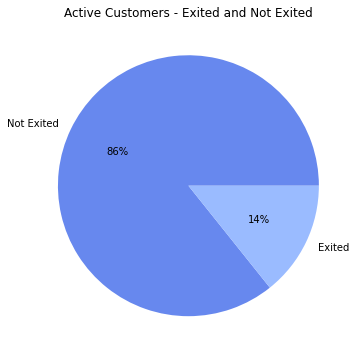

In [43]:
ActiveMember_remain = len(df[(df.IsActiveMember == 1) & (df.Exited == 0)])
ActiveMember_left = len(df[(df.IsActiveMember == 1) & (df.Exited == 1)]) 

#data
case_2 = [ActiveMember_remain,ActiveMember_left]
case_2

#labels
keys = ['Not Exited', 'Exited']

color_p = sn.color_palette('coolwarm')

plt.figure(figsize=(12,6))
plt.title('Active Customers - Exited and Not Exited')
plt.pie(case_2, labels = keys, colors = color_p, autopct = f'%.0f%%')
plt.show()

In both the Cases the rate of customers who leave is less than the customers who are continuing as same as above.
Hence Customer's Active and Inactiveness has not influencing the churn.
Still there are more number of customers 'Not Exited'  in both the cases.

## Data Preprocessing

In [44]:
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


### Label Encoding

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 0 - Female 1 - Male
df['Gender']= le.fit_transform(df['Gender'])

# 0- France, 1 - Germany, 2 - Spain
df['Geography']= le.fit_transform(df['Geography'])

### One Hot Encoding

In [70]:
df1 = pd.get_dummies(data = df, columns = ['NumOfProducts', "Geography"])

In [73]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Geography_0,Geography_1,Geography_2
0,-0.326221,0,0.293517,-1.041760,-1.225848,1,1,0.021886,1,1,0,0,0,1,0,0
1,-0.440036,0,0.198164,-1.387538,0.117350,0,1,0.216534,0,1,0,0,0,0,0,1
2,-1.536794,0,0.293517,1.032908,1.333053,1,0,0.240687,1,0,0,1,0,1,0,0
3,0.501521,0,0.007457,-1.387538,-1.225848,0,0,-0.108918,0,0,1,0,0,1,0,0
4,2.063884,0,0.388871,-1.041760,0.785728,1,1,-0.365276,0,1,0,0,0,0,0,1


### Scaling

In [72]:
cols_to_scale = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

## Final Data Frame for Model 

In [74]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Geography_0,Geography_1,Geography_2
0,-0.326221,0,0.293517,-1.041760,-1.225848,1,1,0.021886,1,1,0,0,0,1,0,0
1,-0.440036,0,0.198164,-1.387538,0.117350,0,1,0.216534,0,1,0,0,0,0,0,1
2,-1.536794,0,0.293517,1.032908,1.333053,1,0,0.240687,1,0,0,1,0,1,0,0
3,0.501521,0,0.007457,-1.387538,-1.225848,0,0,-0.108918,0,0,1,0,0,1,0,0
4,2.063884,0,0.388871,-1.041760,0.785728,1,1,-0.365276,0,1,0,0,0,0,0,1


## Train and Test Data Split

In [75]:
from sklearn.model_selection import train_test_split
X = df1.drop('Exited', axis = 1)
y = df1.Exited

In [76]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Geography_0,Geography_1,Geography_2
0,-0.326221,0,0.293517,-1.041760,-1.225848,1,1,0.021886,1,0,0,0,1,0,0
1,-0.440036,0,0.198164,-1.387538,0.117350,0,1,0.216534,1,0,0,0,0,0,1
2,-1.536794,0,0.293517,1.032908,1.333053,1,0,0.240687,0,0,1,0,1,0,0
3,0.501521,0,0.007457,-1.387538,-1.225848,0,0,-0.108918,0,1,0,0,1,0,0
4,2.063884,0,0.388871,-1.041760,0.785728,1,1,-0.365276,1,0,0,0,0,0,1


In [77]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

In [79]:
X_train.shape, X_test.shape

((8000, 15), (2000, 15))

# Prediction - ANN

In [80]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [106]:
classifier = Sequential()
#input layer
classifier.add(Dense(input_dim = 15, activation = 'relu', units = 512,  kernel_initializer = 'uniform'))
# Dense layer
classifier.add(Dense(activation = 'relu', units = 256, kernel_initializer = 'uniform'))
# Output node
classifier.add(Dense(activation = 'sigmoid', units = 1,kernel_initializer = 'uniform'))

In [107]:
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 512)               8192      
                                                                 
 dense_15 (Dense)            (None, 256)               131328    
                                                                 
 dense_16 (Dense)            (None, 1)                 257       
                                                                 
Total params: 139,777
Trainable params: 139,777
Non-trainable params: 0
_________________________________________________________________


In [108]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'] )

In [109]:
classifier.fit(X_train,y_train,
              validation_data = (X_test,y_test),
              epochs = 100,
              batch_size = 64)

Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.4101 - accuracy: 0.8225 - val_loss: 0.3502 - val_accuracy: 0.8535
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.3548 - accuracy: 0.8575 - val_loss: 0.3467 - val_accuracy: 0.8550
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 0.3449 - accuracy: 0.8586 - val_loss: 0.3340 - val_accuracy: 0.8600
Epoch 4/100
125/125 [==============================] - 0s 3ms/step - loss: 0.3378 - accuracy: 0.8614 - val_loss: 0.3338 - val_accuracy: 0.8580
Epoch 5/100
125/125 [==============================] - 0s 3ms/step - loss: 0.3355 - accuracy: 0.8600 - val_loss: 0.3388 - val_accuracy: 0.8670
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 0.3328 - accuracy: 0.8639 - val_loss: 0.3302 - val_accuracy: 0.8645
Epoch 7/100
125/125 [==============================] - 0s 2ms/step - loss: 0.3296 - accuracy: 0.8646 - val_loss: 0.3311 - val_accuracy: 0.8670

In [110]:
yp = classifier.predict(X_test)

In [111]:
y_pred = []
for i in yp:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [112]:
y_test[:5]

9953    0
3850    0
4962    0
3886    0
5437    0
Name: Exited, dtype: int64

In [113]:
y_pred[:5]

[0, 0, 0, 0, 0]

# Report

### Confusion Matrix

In [114]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1441  144]
 [ 178  237]]


<AxesSubplot:>

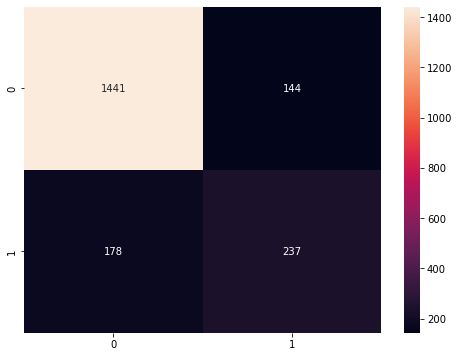

In [116]:
plt.figure(figsize = (8,6))
sn.heatmap(cm, annot = True, fmt = 'd')

###  Classification Report

In [115]:
cp = classification_report(y_test, y_pred)
print(cp)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1585
           1       0.62      0.57      0.60       415

    accuracy                           0.84      2000
   macro avg       0.76      0.74      0.75      2000
weighted avg       0.83      0.84      0.84      2000



#### by : Rajagopal S